This dataset was meant to represent the different components that make up what is considered a red wines greater value. The values that were taken into consideration where as follow: Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfer dioxide, density, pH, sulpahtes, and alcohol. The analysis that follows was done to focus strickly on the Free Sulfer Dioxide and Total Sulfur Dioxide of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
wine_df = pd.read_csv(
    Path("winequality_red.csv")
)

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Quality by Values
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956    

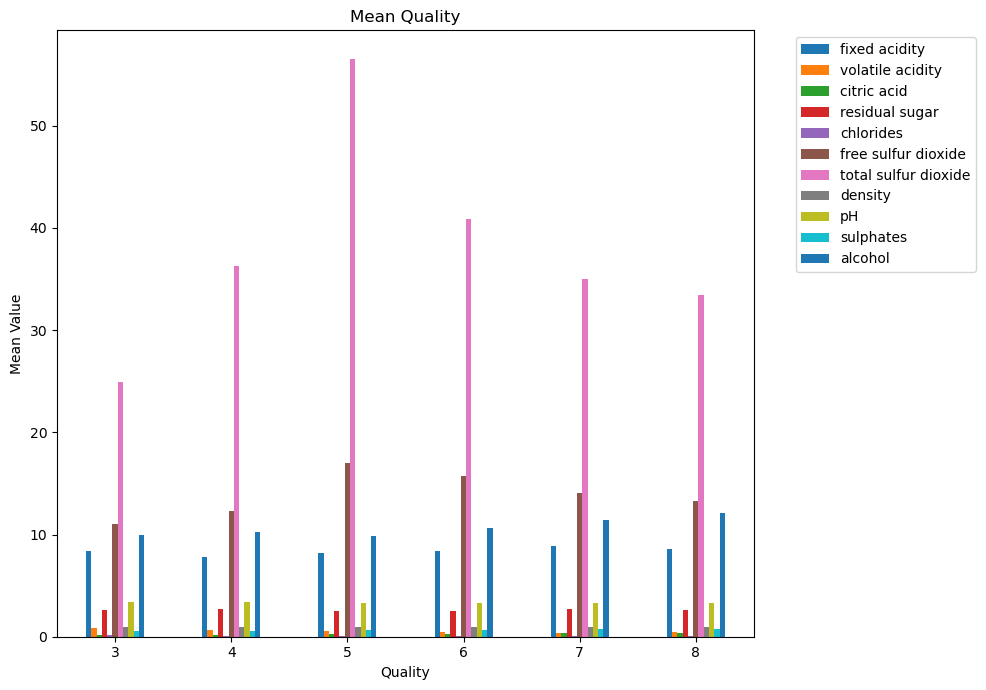

In [3]:
wine_quality = wine_df.groupby('quality').mean()

print("Quality by Values")
print(wine_quality)

wine_quality.plot(kind='bar', figsize=(10, 7), title="Mean Quality", ylabel="Mean Value")

plt.xlabel("Quality")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Right here shows the data as a fair representation across all values taken into consideration. It has taken the mean value of all columns and grouped them by quality scoring.

Mean sulfur quality
         free sulfur dioxide  total sulfur dioxide
quality                                           
3                  11.000000             24.900000
4                  12.264151             36.245283
5                  16.983847             56.513950
6                  15.711599             40.869906
7                  14.045226             35.020101
8                  13.277778             33.444444


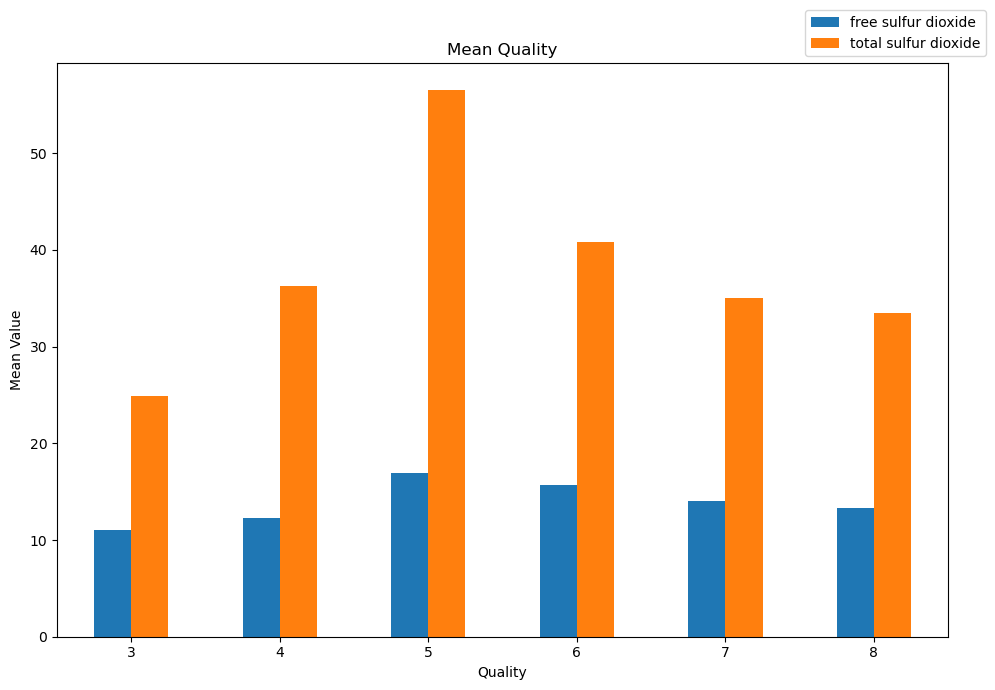

In [4]:
wine_sulfur_df = wine_df.groupby('quality')[['free sulfur dioxide', 'total sulfur dioxide']].mean()

print("Mean sulfur quality")
print(wine_sulfur_df)

wine_sulfur_df.plot(kind='bar', figsize=(10, 7), title="Mean Quality", ylabel="Mean Value")

plt.xlabel("Quality")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()
plt.show()

Here is a cleaner breakdown of the data, fucosing strictly on sulfur dioxides. As can clearly be seen, red wine with a overall quality of 5 had the highest of both free sulfur and total sulfur dioxide. The flux in free sulfur dioxide is subtle, not ranging by more than 5-6%. The same can't be said for total suldur dioxide, ranging a 20% difference between highest and lowest points. All while lesser and greater quailty wines not only less of both overall but have less varience in purportion. It does ask the question of why sulfur dioxide values of that level would rate a quality rating of 5 amoungst the samples, and not lower one, seeing the values in wines with a rating of 7 or 8. Further analysis may be required, and that's where we're heading.

In [14]:
X = wine_df[['free sulfur dioxide', 'total sulfur dioxide']]
y = wine_df['quality']

In [17]:
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling was required in order to transform the data into something more suitable for the training module it was being entered into. SMOTE was used in order to help account for the manority values that would have been ignored otherwise in an unbalanced dataset such as this one. The difference in the values across the columns was too great not to address moving forward. Now while it was not required for the focus of this analysis as they possessed the largest mean values, it would have been helpful for the remaining columns, especially those with much lower mean values.

In [20]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.23


In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.56


In [22]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.59


Different prediction models were used to see what if any difference between the likelyhood of finding "Optimal Outcome Level" when searching for wines based on this criteria.

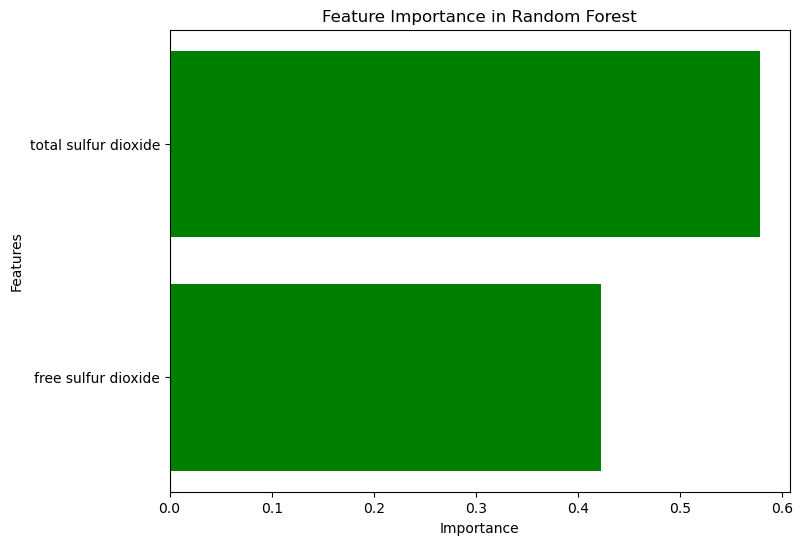

                Feature  Importance
1  total sulfur dioxide    0.578143
0   free sulfur dioxide    0.421857


In [37]:
feature_importances = rf.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(importance_df)

Using Feater Importance to determine the respective relevance of Sulfur Dioxide in wines shows that Total Sulfur Dioxide is more important but only by .16% when compared to Free Sulfur Dioxde. 

In [28]:
higher_quality = [i for i, pred in enumerate(y_pred_rf) if pred == 8] 
high_quality_wines = X_test.iloc[higher_quality]

print("Sulfur Levels for High-Quality:")
print(high_quality_wines.mean())

Sulfur Levels for High-Quality:
free sulfur dioxide     13.001679
total sulfur dioxide    31.326519
dtype: float64


In [27]:
medium_quality = [i for i, pred in enumerate(y_pred_rf) if pred in [5, 6, 7]]  
medium_quality_wines = X_test.iloc[medium_quality]

print("Sulfur Levels for Medium-Quality:")
print(medium_quality_wines.mean())

Sulfur Levels for Medium-Quality:
free sulfur dioxide     15.658519
total sulfur dioxide    44.519046
dtype: float64


In [29]:
lower_quality = [i for i, pred in enumerate(y_pred_rf) if pred in [5, 6, 7]]  
lower_quality_wines = X_test.iloc[lower_quality]

print("Sulfur Levels for Lower-Quality:")
print(lower_quality_wines.mean())

Sulfur Levels for Lower-Quality:
free sulfur dioxide     15.658519
total sulfur dioxide    44.519046
dtype: float64


When comparing the respective mean values for Sulfur Dioxide of the different wine qualities only 2 conclusions can truly be reached. Higher quality wines have a lower concentration of Free and Total Sulfur Dioxide that are closer together in value, 13 and 31. Whereas Medium and Lower Quality wines have a higher concentration with values further apart, 15 and 44.  

In [40]:
free_sulfur_dioxide = np.linspace(X['free sulfur dioxide'].min(), X['free sulfur dioxide'].max(), 100)
total_sulfur_dioxide = np.linspace(X['total sulfur dioxide'].min(), X['total sulfur dioxide'].max(), 100)

synthetic_data = pd.DataFrame({
    'free sulfur dioxide': np.random.choice(free_sulfur_dioxide, 5000),
    'total sulfur dioxide': np.random.choice(total_sulfur_dioxide, 5000)
})

synthetic_data_scaled = scaler.transform(synthetic_data)
synthetic_predictions = rf.predict(synthetic_data_scaled)

quality_synthetic = synthetic_data[synthetic_predictions == 8]

print("Perfect Sulfur Blend:")
print(quality_synthetic.mean())

Perfect Sulfur Blend:
free sulfur dioxide     25.843764
total sulfur dioxide    61.120993
dtype: float64


Synthetic Prediction was done in order to see what the models would look like inside a larger dataset. The results varied, as they should, and this was truly done for no other reason then to establish what a great comparison might look like in respects to the focus of this analysis.